# NLP WITH Neural Networks

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [4]:
data = pd.read_csv('/mnt/New_Volume/Work_From_Home/Data/spam.csv')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1,inplace= True)

In [7]:
data.columns = ['label','message']

In [8]:
data['label'].value_counts()

ham     5854
spam     922
Name: label, dtype: int64

# Step 1 convert label to numbers

In [9]:
data['label'].replace({'ham':1, 'spam':0},inplace= True)

In [10]:
y= data['label']
x = data['message']

In [11]:
# split the data in to test and train 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 42)

# Convert Sentences to Sequences

In [12]:
max_vocab_size = 20000
tokenizer =Tokenizer(num_words = max_vocab_size)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [21]:
word2idx = tokenizer.word_index
V = len(word2idx)
V

8033

In [16]:
x_train = pad_sequences(sequences_train)
print('Shape of x_train tensor = ',x_train.shape)
T = x_train.shape[1]

Shape of x_train tensor =  (5420, 189)


In [18]:
x_test = pad_sequences(sequences_test,maxlen = T)
print('Shape of data test tensor =', x_test.shape)

Shape of data test tensor = (1356, 189)


In [25]:
keras.backend.clear_session()
# Creating the module
# We get to choose the dimension of embedding layer
D = 20 

# Hidden state Dimentionality
M = 15

i = keras.layers.Input(shape = (T,))
x = keras.layers.Embedding(V+1,D)(i)
x = keras.layers.LSTM(M, return_sequences=True)(x)
x = keras.layers.GlobalAveragePooling1D()(x)
x = keras.layers.Dense(1, activation = 'sigmoid')(x)

model = keras.Model(i,x)

In [26]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy' )

history = model.fit(x_train,y_train, epochs = 10, validation_data = (x_test,y_test))

Epoch 1/10
170/170 [==============================] - 4s 13ms/step - loss: 0.4327 - accuracy: 0.8640 - val_loss: 0.3845 - val_accuracy: 0.8636
Epoch 2/10
170/170 [==============================] - 2s 10ms/step - loss: 0.3706 - accuracy: 0.8640 - val_loss: 0.3650 - val_accuracy: 0.8636
Epoch 3/10
170/170 [==============================] - 2s 11ms/step - loss: 0.3452 - accuracy: 0.8640 - val_loss: 0.3330 - val_accuracy: 0.8636
Epoch 4/10
170/170 [==============================] - 2s 10ms/step - loss: 0.3090 - accuracy: 0.8640 - val_loss: 0.3021 - val_accuracy: 0.8636
Epoch 5/10
170/170 [==============================] - 2s 11ms/step - loss: 0.2744 - accuracy: 0.8640 - val_loss: 0.2730 - val_accuracy: 0.8636
Epoch 6/10
170/170 [==============================] - 2s 11ms/step - loss: 0.2446 - accuracy: 0.8657 - val_loss: 0.2480 - val_accuracy: 0.8636
Epoch 7/10
170/170 [==============================] - 2s 11ms/step - loss: 0.2188 - accuracy: 0.8758 - val_loss: 0.2281 - val_accuracy: 0.9145

In [27]:
import matplotlib.pyplot as plt

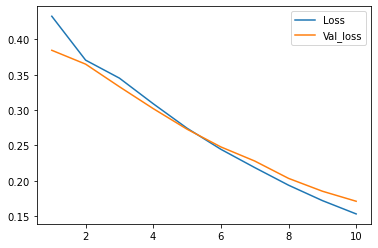

In [32]:
plt.plot([x for x in range(1,11)], history.history['loss'], label = 'Loss')
plt.plot([x for x in range(1,11)], history.history['val_loss'], label = 'Val_loss')
plt.legend()
plt.show()

In [33]:
s = 'Hello How are you? this is a test email'

In [34]:
s_ = tokenizer.texts_to_sequences(s)
s_ = pad_sequences(s_,maxlen = T)

In [37]:
model.predict([s_])

array([[0.9175065 ],
       [0.9182743 ],
       [0.9145363 ],
       [0.9145363 ],
       [0.9183405 ],
       [0.91564906],
       [0.9175065 ],
       [0.9183405 ],
       [0.91705847],
       [0.91564906],
       [0.9149261 ],
       [0.9167905 ],
       [0.9182743 ],
       [0.91564906],
       [0.91893464],
       [0.9183405 ],
       [0.914623  ],
       [0.91564906],
       [0.91564906],
       [0.9112366 ],
       [0.9175065 ],
       [0.9189265 ],
       [0.9180007 ],
       [0.91564906],
       [0.9189265 ],
       [0.9180007 ],
       [0.91564906],
       [0.9149261 ],
       [0.91564906],
       [0.9112366 ],
       [0.9182743 ],
       [0.9180007 ],
       [0.9112366 ],
       [0.91564906],
       [0.9182743 ],
       [0.9131416 ],
       [0.9149261 ],
       [0.9189265 ],
       [0.9145363 ]], dtype=float32)

In [38]:
print('Hello World')

Hello World


In [39]:
c = 10
d = 2
e = c+d
print(e)

12


In [40]:
print(10)

10
